# Predict Model from Soggetti



In [2]:
# import code

import intervals
from intervals import * 
from intervals import main_objs
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import intervals.visualizations as viz

In [84]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0008"  # <==  put your model number here!
mass_id = "0005" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list

['https://crimproject.org/mei/CRIM_Model_0008.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_2.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_3.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_4.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_5.mei']

In [85]:
# Or build a list by hand:
corpus_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
              'https://crimproject.org/mei/CRIM_Model_0011.mei',
             'https://crimproject.org/mei/CRIM_Model_0014.mei', 
              'https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0008_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0008_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0008_5.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0009_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0009_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_5.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0012_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0012_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_5.mei']


### 1.1 Melodic Entries as Similarity Matrix

* Use the **modelFinder** method to build a table summarizing the percentage of "entries" shared among the pieces. 
* These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
thematic (i.e. recurring) melodies can be found as thematic melodies in all the other pieces in your corpus**. The
specific number of times they appear in the model is not considered, provided that it is
at least two.


### How to Read the Results:

* As you read across, you will see the percentage of melodies in the row value that come from the corresponding column value.  

In [86]:
corpus = CorpusBase(corpus_list)
similarity_matrix = corpus.modelFinder(n=6)
similarity_matrix 

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014,CRIM_Mass_0008_1,CRIM_Mass_0008_2,CRIM_Mass_0008_3,CRIM_Mass_0008_4,CRIM_Mass_0008_5,CRIM_Mass_0009_1,CRIM_Mass_0009_2,CRIM_Mass_0009_3,CRIM_Mass_0009_4,CRIM_Mass_0009_5,CRIM_Mass_0012_1,CRIM_Mass_0012_2,CRIM_Mass_0012_3,CRIM_Mass_0012_4,CRIM_Mass_0012_5
Mass,,,,,,,,,,,,,,,,,,
CRIM_Model_0010,1.000000,0.000000,0.037037,0.129630,0.222222,0.037037,0.000000,0.000000,0.000000,0.055556,0.000000,0.074074,0.055556,0.037037,0.037037,0.037037,0.000000,0.000000
CRIM_Model_0011,0.000000,1.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000
CRIM_Model_0014,0.216216,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108108,0.216216,0.000000,0.000000,0.486486,0.594595,0.108108,0.216216,0.270270
CRIM_Mass_0008_1,0.692308,0.000000,0.000000,1.000000,0.153846,0.153846,0.000000,0.153846,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CRIM_Mass_0008_2,0.600000,0.100000,0.000000,0.150000,1.000000,0.100000,0.000000,0.000000,0.000000,0.250000,0.000000,0.100000,0.150000,0.000000,0.000000,0.200000,0.000000,0.000000
CRIM_Mass_0008_3,0.086957,0.000000,0.000000,0.086957,0.086957,1.000000,0.000000,0.086957,0.000000,0.000000,0.086957,0.173913,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000
CRIM_Mass_0008_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.000000,0.187500,0.000000
CRIM_Mass_0008_5,0.000000,0.000000,0.000000,0.133333,0.000000,0.133333,0.200000,1.000000,0.000000,0.000000,0.133333,0.133333,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000
CRIM_Mass_0009_1,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###  1.2 The Melodic Matrix as Heatmap


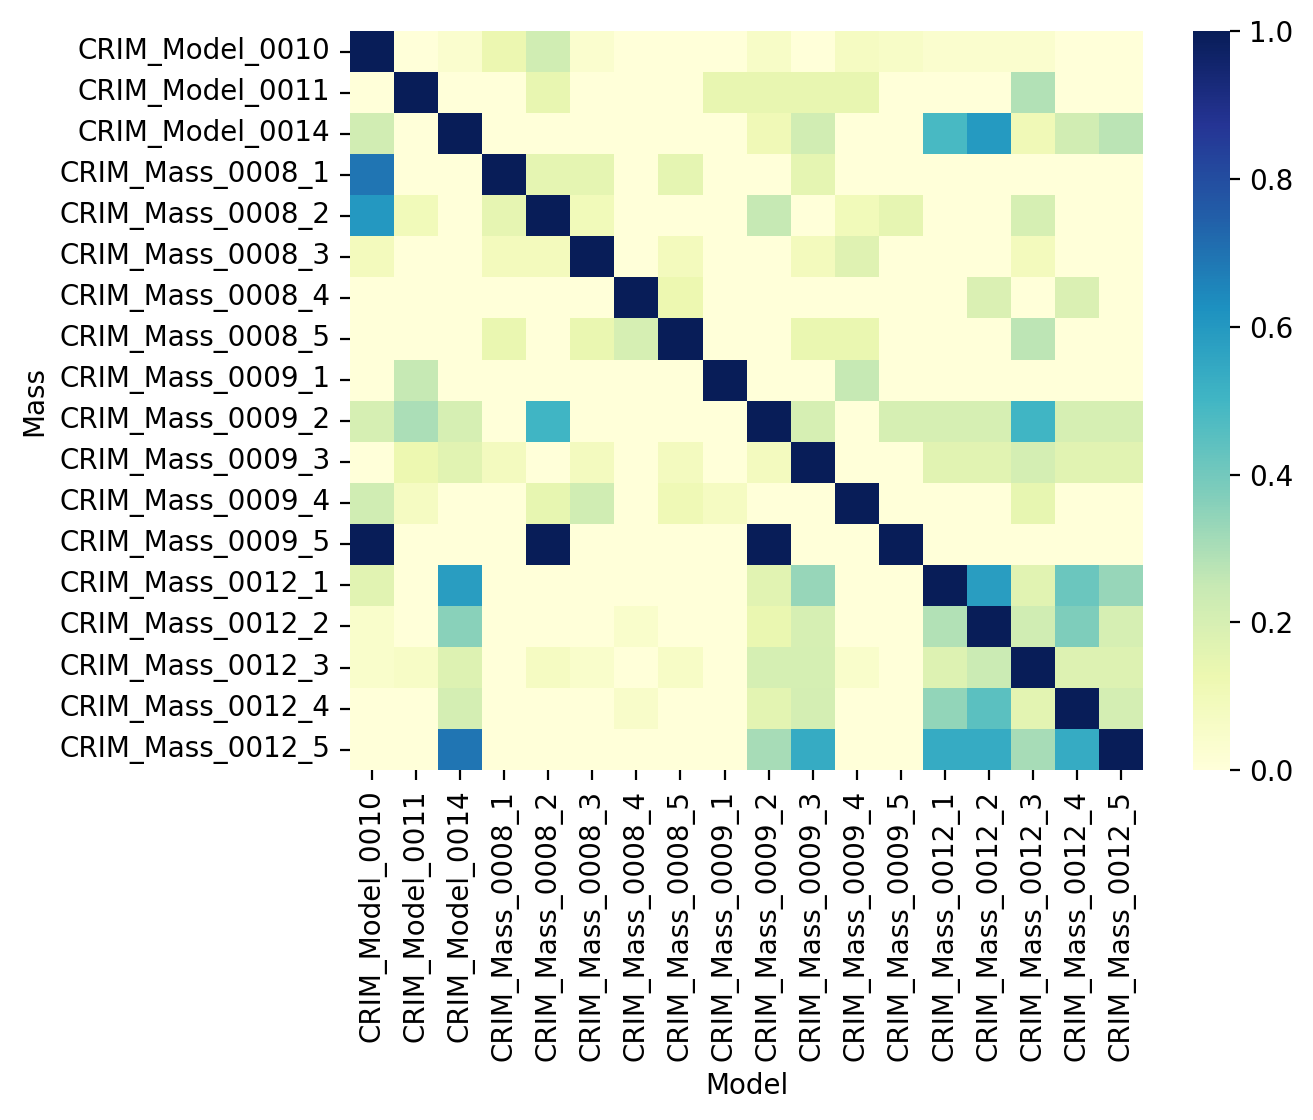

In [87]:
# melodic matrix
dataplot = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=False)
plt.show()

### 1.3 Models and Masses as distinct sets 

Making separate model and mass lists makes things a bit neater, since don't compare pieces to themselves

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot
```

In [88]:
model_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
              'https://crimproject.org/mei/CRIM_Model_0011.mei',
             'https://crimproject.org/mei/CRIM_Model_0014.mei']
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0008_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0008_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0008_5.mei',
            'https://crimproject.org/mei/CRIM_Mass_0009_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0009_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0009_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0009_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0009_5.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_1.mei',
         'https://crimproject.org/mei/CRIM_Mass_0012_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0012_3.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_5.mei']             

In [5]:
model_list = ['Music_Files/Conseil_Adjuva.musicxml',
'Music_Files/Fevin_Benedictus.musicxml',
'Music_Files/Gascoigne_Deus.musicxml',
'Music_Files/Sermisy_Impetum.musicxml']
mass_list = ['Music_Files/Sermisy_Missa_Plumi_1.musicxml', 
'Music_Files/Sermisy_Missa_Plumi_2.musicxml',
'Music_Files/Sermisy_Missa_Plumi_3.musicxml',
'Music_Files/Sermisy_Missa_Plumi_4.musicxml',
'Music_Files/Sermisy_Missa_Plumi_5.musicxml']            

In [9]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,Conseil_Adjuva,Fevin_Benedictus,Gascoigne_Deus,Sermisy_Impetum
Mass,,,,
Sermisy_Missa_Plumi_1,0.375000,0.375000,0.625000,0.125000
Sermisy_Missa_Plumi_2,0.272727,0.409091,0.681818,0.181818
Sermisy_Missa_Plumi_3,0.426230,0.295082,0.344262,0.213115
Sermisy_Missa_Plumi_4,0.333333,0.177778,0.200000,0.288889
Sermisy_Missa_Plumi_5,0.142857,0.257143,0.200000,0.428571


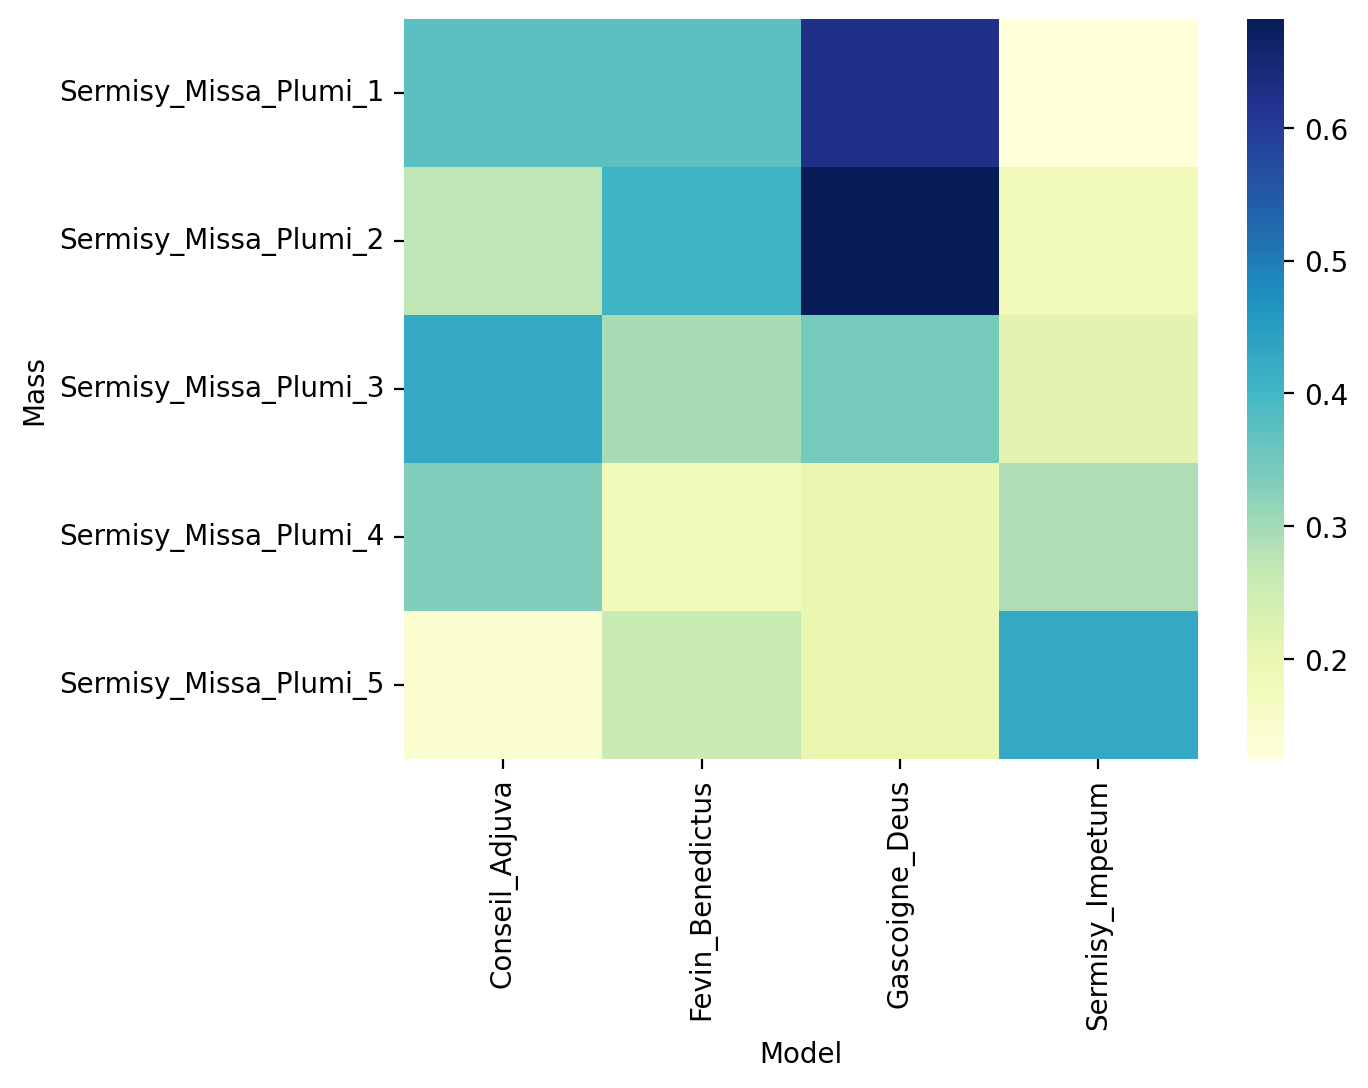

In [10]:
# melodic matrix
dataplot = sns.heatmap(cross_plot, cmap="YlGnBu", annot=False)
plt.show()


### 1.4 Contrapuntal (Modular) Ngrams as Similarity Matrix

* **Contrapuntal Modules** are 'ngrams' that represent the motion of a pair of voices.  The tool finds the patterns between every pair of voices, then filters these to correspond to the moments of the 'entries'.  So it tells us not only that there are shared melodies, but what is happening to the melodies in their contrapuntal context.
* `moduleFinder`  method identifies all of the `modular ngrams` in each piece that **coincide with the melodic entries**.  These are the modules found in _all_ voices around the moment of the given melodic entry, so they will
include both the entries and other soggetti, too.

* Lists of unique modular ngrams are then compared across the corpus, resulting in a matrix of values.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
modular ngrams (the ones that occur at the moment of the entries) can be found in each of the other pieces in the corpus.**

#### How to Read the Results:
    - As you read across, you will see the percentage of modular ngrams in the row value that come from the corresponding column value.  

In [51]:
corpus = CorpusBase(corpus_list)
module_matrix = corpus.moduleFinder()
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014,CRIM_Mass_0008_1,CRIM_Mass_0008_2,CRIM_Mass_0008_3,CRIM_Mass_0008_4,CRIM_Mass_0008_5,CRIM_Mass_0009_1,CRIM_Mass_0009_2,CRIM_Mass_0009_3,CRIM_Mass_0009_4,CRIM_Mass_0009_5,CRIM_Mass_0012_1,CRIM_Mass_0012_2,CRIM_Mass_0012_3,CRIM_Mass_0012_4,CRIM_Mass_0012_5
Mass,,,,,,,,,,,,,,,,,,
CRIM_Model_0010,1.000000,0.648408,0.637640,0.693352,0.711142,0.713015,0.669476,0.690075,0.642322,0.662921,0.677903,0.649813,0.637640,0.544944,0.578184,0.588483,0.568352,0.548689
CRIM_Model_0011,0.630102,1.000000,0.573980,0.591837,0.581633,0.637755,0.609694,0.584184,0.556122,0.604592,0.637755,0.561224,0.553571,0.400510,0.436224,0.464286,0.433673,0.408163
CRIM_Model_0014,0.695513,0.657051,1.000000,0.637821,0.666667,0.682692,0.605769,0.631410,0.580128,0.615385,0.673077,0.567308,0.544872,0.471154,0.554487,0.528846,0.493590,0.464744
CRIM_Mass_0008_1,0.710452,0.597458,0.557910,1.000000,0.627119,0.668079,0.621469,0.637006,0.566384,0.593220,0.597458,0.587571,0.562147,0.457627,0.500000,0.508475,0.509887,0.483051
CRIM_Mass_0008_2,0.709622,0.602234,0.595361,0.639175,1.000000,0.691581,0.623711,0.646907,0.589347,0.634880,0.649485,0.603952,0.597938,0.501718,0.544674,0.561856,0.526632,0.506873
CRIM_Mass_0008_3,0.701613,0.637097,0.618280,0.660215,0.685484,1.000000,0.653763,0.681183,0.612366,0.647849,0.673118,0.618280,0.606452,0.527419,0.560215,0.583333,0.543011,0.524194
CRIM_Mass_0008_4,0.733333,0.669697,0.631818,0.693939,0.686364,0.743939,1.000000,0.712121,0.650000,0.656061,0.695455,0.672727,0.639394,0.534848,0.577273,0.589394,0.589394,0.553030
CRIM_Mass_0008_5,0.798551,0.764130,0.757609,0.779710,0.781884,0.805797,0.779710,1.000000,0.763768,0.768841,0.777174,0.764493,0.761232,0.719565,0.732971,0.740217,0.734783,0.723913
CRIM_Mass_0009_1,0.649306,0.576389,0.548611,0.593750,0.572917,0.621528,0.593750,0.628472,1.000000,0.562500,0.614583,0.586806,0.576389,0.395833,0.402778,0.427083,0.430556,0.430556


In [12]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,Conseil_Adjuva,Fevin_Benedictus,Gascoigne_Deus,Sermisy_Impetum
Mass,,,,
Sermisy_Missa_Plumi_1,0.500000,0.500000,0.537313,0.492537
Sermisy_Missa_Plumi_2,0.432787,0.432787,0.468852,0.436066
Sermisy_Missa_Plumi_3,0.296296,0.264198,0.279012,0.279012
Sermisy_Missa_Plumi_4,0.458861,0.471519,0.462025,0.458861
Sermisy_Missa_Plumi_5,0.461187,0.447489,0.442922,0.456621


### 1.6 Module Matrix as Heatmap


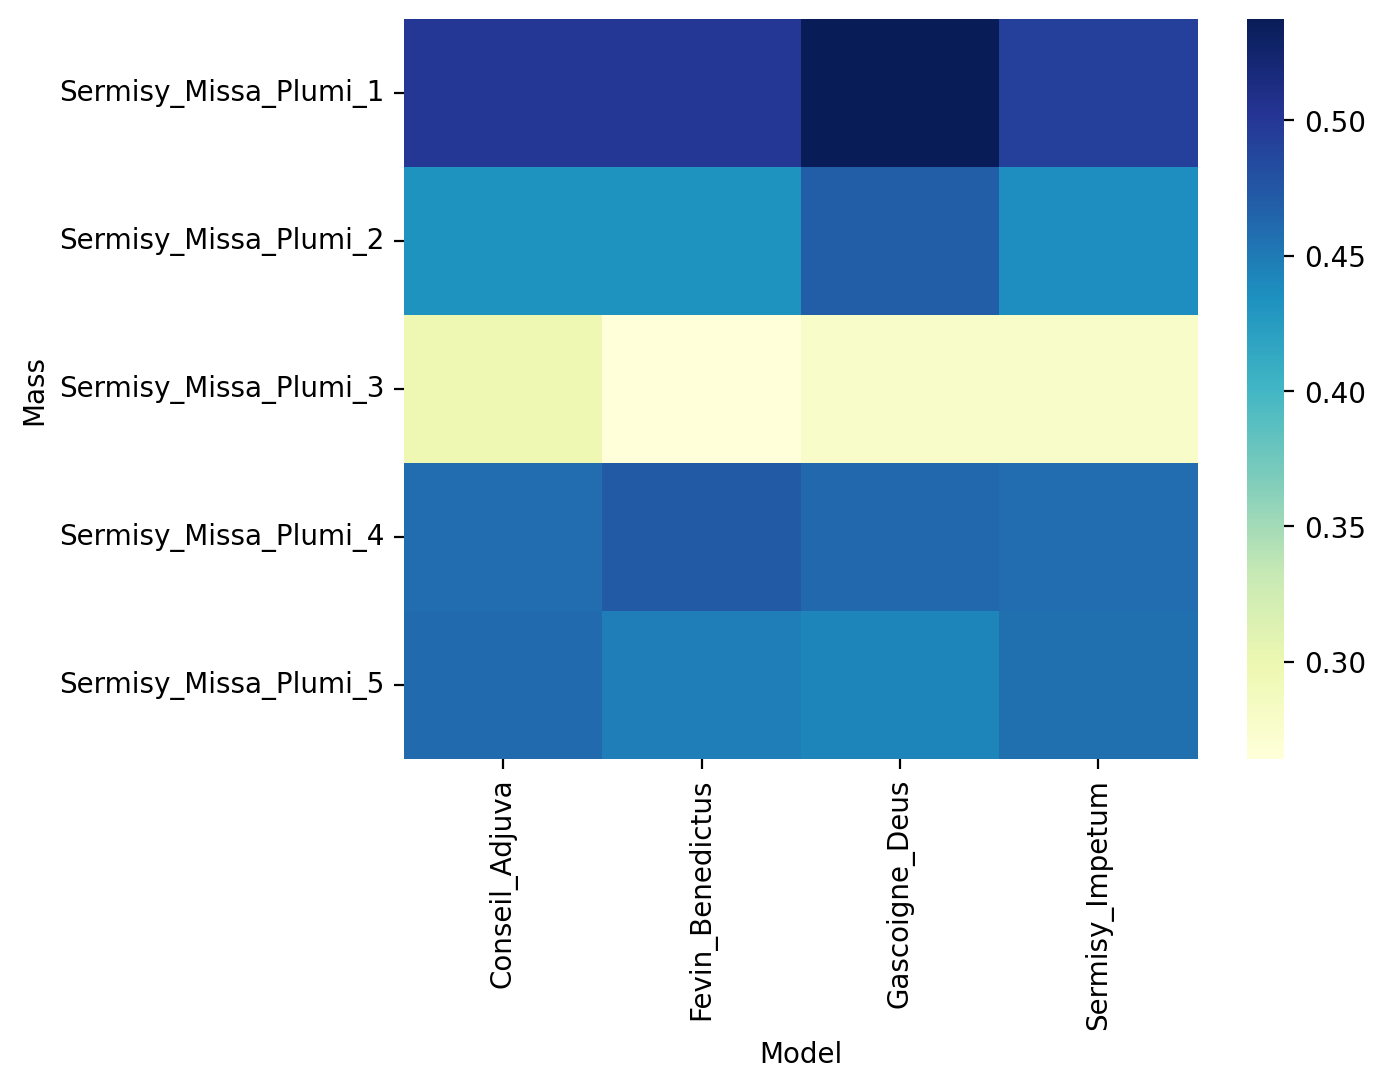

In [13]:
# module matrix

dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

### 1.7. Module Matrix with Separate Lists of Models and Masses

Define the lists above

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
cross_plot
```

In [19]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_cross_plot = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_cross_plot

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.710452,0.597458,0.557910
CRIM_Mass_0008_2,0.709622,0.602234,0.595361
CRIM_Mass_0008_3,0.701613,0.637097,0.618280
CRIM_Mass_0008_4,0.733333,0.669697,0.631818
CRIM_Mass_0008_5,0.798551,0.764130,0.757609
CRIM_Mass_0009_1,0.649306,0.576389,0.548611
CRIM_Mass_0009_2,0.634766,0.558594,0.523438
CRIM_Mass_0009_3,0.631356,0.574153,0.554025
CRIM_Mass_0009_4,0.636574,0.562500,0.527778


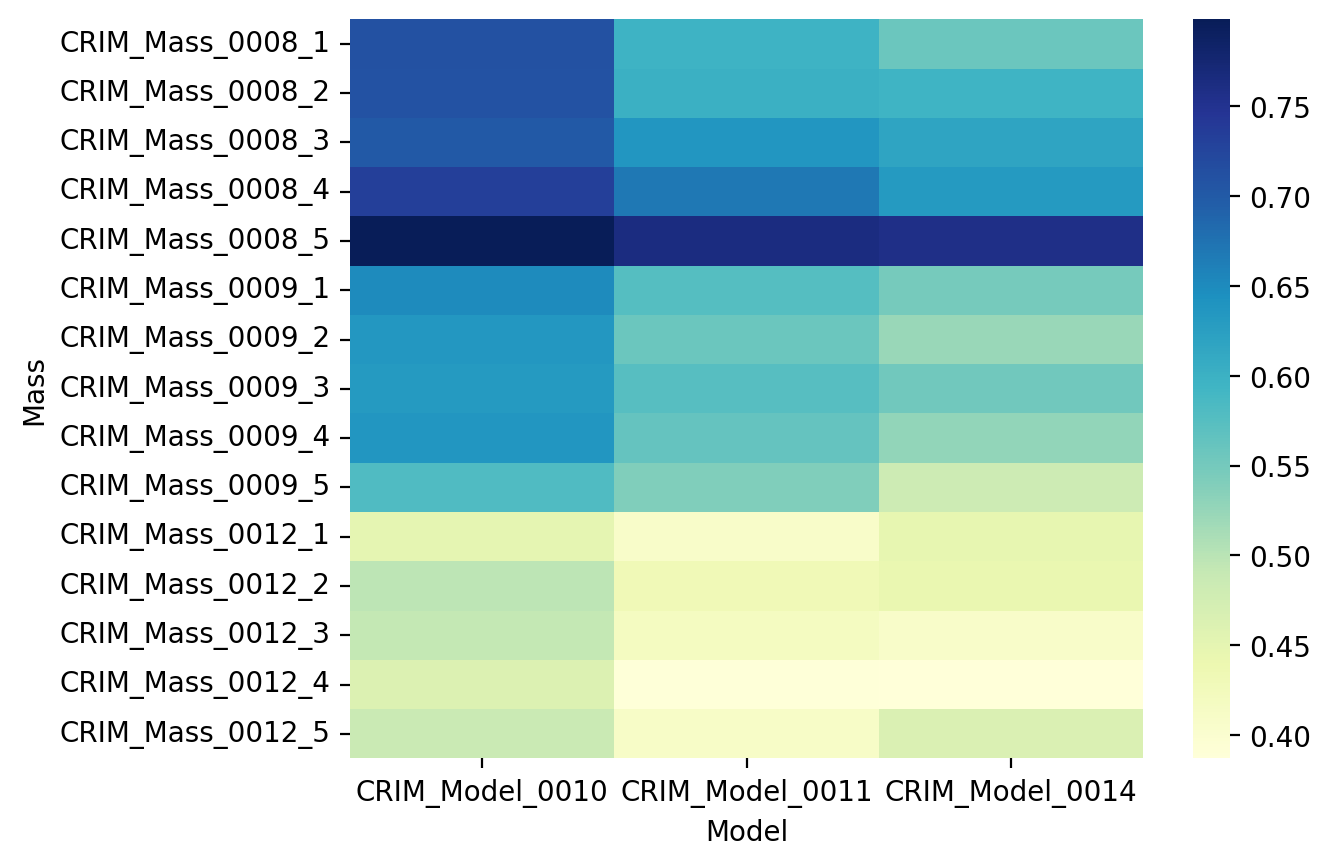

In [20]:
# melodic matrix
dataplot = sns.heatmap(module_cross_plot, cmap="YlGnBu", annot=False)
plt.show()

# Shared Entries (Micro Level)

#### Here we explore _where_ and _how_ the shared melodies are presented in each piece

* Load a specific pair of closely related pieces from your corpus
* Find exactly which melodic entries are shared
* Find out *where* these melodies occur in each piece
* Check the Fuga, PEN, and ID Presentation Types to see how the melodies are treated in each piece.  Pick one or two melodies (and Presentation Types) as examples to describe.

In [18]:
model_list
mass_list

['Music_Files/Sermisy_Missa_Plumi_1.musicxml',
 'Music_Files/Sermisy_Missa_Plumi_2.musicxml',
 'Music_Files/Sermisy_Missa_Plumi_3.musicxml',
 'Music_Files/Sermisy_Missa_Plumi_4.musicxml',
 'Music_Files/Sermisy_Missa_Plumi_5.musicxml']

In [19]:
# Specify the Model
model = model_list[2] # <== the model will be score "0"
model = importScore(model)

# Specify the Mass Movement(s)
mass_movement = mass_list[0] # <== select the index number of your mass from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
print(model.metadata, mass_movement.metadata)

Previously imported piece detected.
Previously imported piece detected.
{'title': 'Deus regnorum', 'composer': 'Mathieu Gascongne'} {'title': 'Missa Plurium motettorum: Kyrie - Christe - Kyrie', 'composer': 'Claudin de Sermisy'}


### Get the Entries and Detailed Index for A Pair of Pieces


In [21]:
# for the model
model_entries = model.entries(thematic=True, anywhere=True, n=4)
# model_entries = model_entries.applymap(convertTuple)
model_entries_det = model.detailIndex(model_entries, offset=True, progress=True)

# for the mass movement
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
# mass_movement_entries = mass_movement_entries.applymap(convertTuple)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=True, progress=True)

# check the detailed view as needed for each
# model_entries_det
model_entries_det

[Superius] [Contratenor]          [Tenor]  \
Measure Beat Offset Progress                                                   
1       1.0  4.0    0.003003   (3, -2, -2, 3)           NaN  (5, -2, -2, -2)   
5       3.0  40.0   0.030030    (2, 2, -2, 2)           NaN    (2, 2, -2, 2)   
7       3.0  56.0   0.042042  (-2, 2, -2, -2)           NaN  (-2, 2, -2, -2)   
9       1.0  68.0   0.051051              NaN           NaN  (2, -2, -2, -2)   
        4.0  74.0   0.055556              NaN           NaN  (-2, -2, -2, 2)   
...                                       ...           ...              ...   
162     1.0  1300.0 0.975976              NaN           NaN              NaN   
        3.0  1304.0 0.978979  (-2, -2, -2, 2)           NaN              NaN   
163     1.0  1308.0 0.981982              NaN           NaN  (-2, -2, -2, 2)   
        3.0  1312.0 0.984985   (2, -2, -2, 2)           NaN    (-2, 2, 2, 2)   
        4.0  1314.0 0.986486              NaN           NaN    (2, 2, 2, -3)   

                                     [Bassus]  
Measure Beat Offset Progress                   
1       1.0  4.0    0.003003              NaN  
5       3.0  40.0   0.030030              NaN  
7       3.0  56.0   0.042042              NaN  
9       1.0  68.0   0.051051              NaN  
        4.0  74.0   0.055556  (4, -2, -2, -2)  
...                                       ...  
162     1.0  1300.0 0.975976  (-2, -2, -2, 2)  
        3.0  1304.0 0.978979              NaN  
163     1.0  1308.0 0.981982              NaN  
        3.0  1312.0 0.984985              NaN  
        4.0  1314.0 0.986486              NaN  

[298 rows x 4 columns]

#### Find the nGrams shared by your pieces

In [22]:

model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[1:]
shared_entries


[('2', '2', '2', '-2'),
 ('-2', '-2', '-2', '2'),
 ('3', '2', '2', '2'),
 ('2', '2', '-3', '2')]

##  Make a Heatmap of Shared Entries in Two Pieces

* Let's look at **where** the shared melodies appear in each of your pieces.

* Judging only from the visualization, where do the shared melodies appear, and how similar does the treatment of them seem to be?

#### Note that you can also decide to compare one MASS movement with another MASS movement!

### Model Heatmap

In [23]:
## Use this for the Model Heatmap

nr = model.notes(combineUnisons=True) 
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = model.ngrams(df=mel, n=4)
entry_ngrams = model.entries(df=mel, n=4)
mel_ngrams_duration = model.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])


alt.VConcatChart(...)

### Mass Movement Heatmap

In [24]:
## Use this for the Mass Movement Heatmap

nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])

alt.VConcatChart(...)

### Make the Short Lists of These Shared Ngrams and Their Offsets

In [27]:
# for the model
model_short_list = model_entries_det[model_entries_det.isin(shared_entries)].dropna(how='all').stack()
model_offsets_of_shared_entries = model_short_list.index.get_level_values(2)
model_offsets_of_shared_entries = model_offsets_of_shared_entries.unique()

# for the mass movement
mass_movement_short_list = mass_movement_entries_det[mass_movement_entries_det.isin(shared_entries)].dropna(how='all').stack()
mass_movement_offsets_of_shared_entries = mass_movement_short_list.index.get_level_values(2)
mass_movement_offsets_of_shared_entries = mass_movement_offsets_of_shared_entries.unique()

mass_movement_offsets_of_shared_entries

Float64Index([  4.0,  12.0,  48.0,  84.0,  86.0, 100.0, 102.0, 104.0, 128.0,
              180.0, 184.0, 207.5, 236.0, 260.0, 296.0, 320.0, 324.0, 346.0,
              368.0, 376.0, 384.0, 388.0, 392.0, 404.0, 432.0, 440.0, 448.0,
              452.0, 456.0],
             dtype='float64', name='Offset')

### Get Shared Entries as Presentation Types

* Note that not all shared entries will be used as Fuga, ID, and PEN but for those that appear in a pair of pieces, it can be informative to compare **how** they are treated!



In [28]:
# here we filter the PTypes to include ONLY those found in both the model and Mass movement

# here for the model
model_p_types = model.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)

model_shared_entry_ptypes = model_p_types[model_p_types.First_Offset.isin(model_offsets_of_shared_entries)]

# here for the Mass movement


mass_movement_p_types = mass_movement.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)


mass_movement_shared_entry_ptypes = mass_movement_p_types[mass_movement_p_types.First_Offset.isin(mass_movement_offsets_of_shared_entries)]
combined_ptypes = pd.concat([model_shared_entry_ptypes, mass_movement_shared_entry_ptypes])
combined_ptypes

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
1,Mathieu Gascongne,Deus regnorum,256.0,"[32/3.0, 36/3.0]",[P1],"[256.0, 288.0]","[(2, 2, -3, 2)]",[32.0],"[[Contratenor], [Contratenor]]",FUGA,2,False,0.0,None,1
5,Mathieu Gascongne,Deus regnorum,434.0,"[54/4.0, 56/2.0, 58/4.0, 62/4.0, 63/2.0, 63/4....","[P-5, P1, P1, P-8, P5, P8]","[434.0, 446.0, 466.0, 498.0, 502.0, 506.0, 526.0]","[(2, 2, 2, -2)]","[12.0, 20.0, 32.0, 4.0, 4.0, 20.0]","[[Superius], [Contratenor], [Tenor], [Contrate...",FUGA,7,False,0.0,None,0
6,Mathieu Gascongne,Deus regnorum,602.0,"[74/4.0, 75/2.0]",[P-5],"[602.0, 606.0]","[(-2, -2, -2, 2)]",[4.0],"[[Superius], [Contratenor]]",FUGA,2,False,0.0,None,0
11,Mathieu Gascongne,Deus regnorum,1260.0,"[157/1.0, 159/3.0, 160/1.0, 163/1.0]","[P8, P-8, P1]","[1260.0, 1280.0, 1284.0, 1308.0]","[(-2, -2, -2, 2)]","[20.0, 4.0, 24.0]","[[Tenor], [Superius], [Tenor], [Tenor]]",FUGA,4,False,0.0,None,1
4,Claudin de Sermisy,Missa Plurium motettorum: Kyrie - Christe - Kyrie,368.0,"[44/3.0, 45/3.0, 46/3.0, 52/3.0, 53/3.0, 54/3.0]","[P-4, P11, P-8, P-4, P11]","[368.0, 376.0, 384.0, 432.0, 440.0, 448.0]","[(-2, -2, -2, 2)]","[8.0, 8.0, 48.0, 8.0, 8.0]","[Tenor, Bassus, Superius, Tenor, Bassus, Super...",FUGA,6,False,0.0,None,0


### Now, Sort the Results so we see the Shared Melodies Together


In [26]:
combined_ptypes.sort_values('Soggetti')

NameError: name 'combined_ptypes' is not defined

In [82]:
piece.verovioPtypes(model_shared_entry_ptypes)

Results:
File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 14-22
Presentation Type:  FUGA
Voices:  ['Bassus', 'Primus Tenor']
Number of Entries:  2
Soggetti:  [('4', '-2', '-3', '2')]
Melodic Entry Intervals:  ['P5']
Time Entry Intervals:  [34.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<lin

File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 24-35
Presentation Type:  FUGA
Voices:  ['Bassus', 'Primus Tenor', 'Superius']
Number of Entries:  3
Soggetti:  [('2', '-2', '4', '-2')]
Melodic Entry Intervals:  ['P4', 'P8']
Time Entry Intervals:  [48.0, 12.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 32-40
Presentation Type:  FUGA
Voices:  ['Contratenor', 'Superius']
Number of Entries:  2
Soggetti:  [('2', '2', '2', '-2')]
Melodic Entry Intervals:  ['P4']
Time Entry Intervals:  [32.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 33-41
Presentation Type:  FUGA
Voices:  ['Bassus', 'Secundus Tenor']
Number of Entries:  2
Soggetti:  [('3', '2', '2', '2'), ('2', '2', '2', '2')]
Melodic Entry Intervals:  ['P5']
Time Entry Intervals:  [28.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 108-116
Presentation Type:  FUGA
Voices:  ['Bassus', 'Primus Tenor', 'Secundus Tenor']
Number of Entries:  3
Soggetti:  [('-2', '2', '2', '-2'), ('-3', '2', '2', '-2')]
Melodic Entry Intervals:  ['P4', 'P1']
Time Entry Intervals:  [4.0, 24.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 133-144
Presentation Type:  FUGA
Voices:  ['Secundus Tenor', 'Secundus Tenor']
Number of Entries:  2
Soggetti:  [('2', '2', '2', '-2')]
Melodic Entry Intervals:  ['M2']
Time Entry Intervals:  [60.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 136-143
Presentation Type:  FUGA
Voices:  ['Bassus', 'Primus Tenor']
Number of Entries:  2
Soggetti:  [('-2', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['P4']
Time Entry Intervals:  [28.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 151-157
Presentation Type:  FUGA
Voices:  ['Primus Tenor', 'Bassus', 'Secundus Tenor']
Number of Entries:  3
Soggetti:  [('-2', '-2', '-2', '2'), ('-3', '-2', '-2', '2')]
Melodic Entry Intervals:  ['P-4', 'P4']
Time Entry Intervals:  [8.0, 12.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 170-182
Presentation Type:  FUGA
Voices:  ['Bassus', 'Bassus']
Number of Entries:  2
Soggetti:  [('2', '2', '2', '-2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [70.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 215-223
Presentation Type:  FUGA
Voices:  ['Bassus', 'Contratenor', 'Secundus Tenor', 'Superius']
Number of Entries:  4
Soggetti:  [('-2', '-2', '3', '2')]
Melodic Entry Intervals:  ['P8', 'P1', 'P8']
Time Entry Intervals:  [12.0, 12.0, 8.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 247-256
Presentation Type:  FUGA
Voices:  ['Superius', 'Superius']
Number of Entries:  2
Soggetti:  [('2', '2', '-2', '-2'), ('3', '2', '-2', '-2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [38.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0010
Claudin de Sermisy
Quare fremuerunt gentes
Measures: 263-271
Presentation Type:  FUGA
Voices:  ['Bassus', 'Secundus Tenor', 'Primus Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('3', '2', '2', '2'), ('2', '2', '2', '2')]
Melodic Entry Intervals:  ['P5', 'P1', 'P-8']
Time Entry Intervals:  [2.0, 12.0, 16.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0
